Running test case 0 with input '[3,[0.1,0.2,0.1,0.2,0.7]]'...


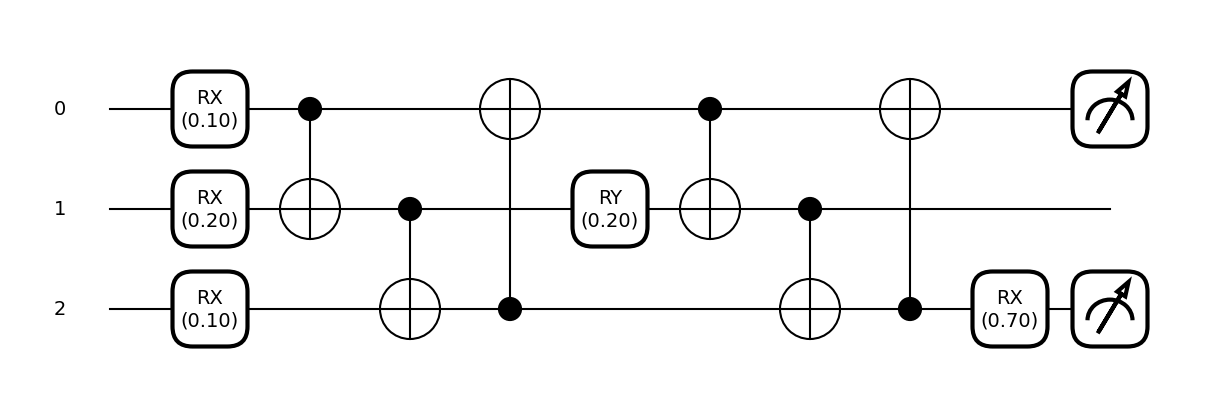

((array(0.01271348), array(0.), array(0.01271348), array(0.00629274), array(0.00151445)), (array(0.), array(-0.62104297), array(0.07694575), array(0.12480844), array(-0.60363714)), (array(0.01271348), array(0.07694575), array(-0.60832949), array(-0.62762194), array(-0.07253642)), (array(0.00629274), array(0.12480844), array(-0.62762194), array(0.13752191), array(-0.04442377)), (array(0.00151445), array(-0.60363714), array(-0.07253642), array(-0.04442377), array(-0.60832949)))
Correct!
Running test case 1 with input '[2,[0.3, 1.1, 0.4, 1.3]]'...


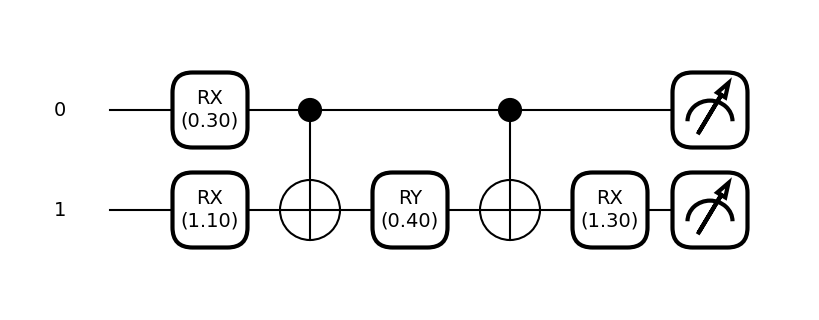

((array(0.71360951), array(0.19405168), array(0.01396352), array(0.18941711)), (array(0.19405168), array(0.71360951), array(0.08868975), array(0.63969944)), (array(0.01396352), array(0.08868975), array(-0.10676674), array(0.16259982)), (array(0.18941711), array(0.63969944), array(0.16259982), array(0.71360951)))


AssertionError: Your function does not calculate the Hessian correctly.

In [14]:
import json
import pennylane as qml
import pennylane.numpy as np
from matplotlib import pyplot as plt

def compute_hessian(num_wires, w):
    """
    This function must create a circuit with num_wire qubits 
    as per the challenge statement and return the Hessian of such
    circuit evaluated on w.

    Args:
        - num_wires = The number of wires in the circuit
        - w (np.ndarray): A list of length num_wires + 2 containing float parameters. 
        The Hessian is evaluated at this point in parameter space.

    Returns:
        Union(tuple, np.ndarray): A matrix representing the Hessian calculated via 
        qml.gradients.parameter_shift_hessian
    """
    


    # Define your device and QNode
    dev = qml.device("default.qubit", wires=num_wires)
    
    @qml.qnode(dev)
    def circuit(params):
        for i in range(num_wires):
            qml.RX(params[i], wires=i)
        qml.broadcast(qml.CNOT, wires=[i for i in range(num_wires)], pattern="ring")
        qml.RY(params[num_wires], wires=1)
        qml.broadcast(qml.CNOT, wires=[i for i in range(num_wires)], pattern="ring")
        qml.RX(params[num_wires+1], wires=num_wires-1)
        return qml.expval(qml.PauliZ(0) @ qml.PauliZ(num_wires-1))
    

    hessian = qml.gradients.param_shift_hessian(circuit)(w)

    return hessian
    # Return the Hessian using qml.gradient.param_shift_hessian
    


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    
    ins = json.loads(test_case_input)
    wires = ins[0]
    weights = np.array(ins[1], requires_grad = True)
    output = compute_hessian(wires, weights)
    
    if isinstance(output,(tuple)):
        output = np.array(output).numpy().round(3)    
        return str([elem.tolist() for elem in output])
    
    elif isinstance(output,(np.tensor)):
        
        return str(output.tolist())
    
def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    
    assert np.allclose(solution_output, expected_output, atol=1e-2), "Your function does not calculate the Hessian correctly."


# These are the public test cases
test_cases = [
    ('[3,[0.1,0.2,0.1,0.2,0.7]]', '[[0.013, 0.0, 0.013, 0.006, 0.002], [0.0, -0.621, 0.077, 0.125, -0.604], [0.013, 0.077, -0.608, -0.628, -0.073], [0.006, 0.125, -0.628, 0.138, -0.044], [0.002, -0.604, -0.073, -0.044, -0.608]]'),
    ('[2,[0.3, 1.1, 0.4, 1.3]]', '[[0.0, 0.0, -0.0, 0.0], [0.0, -0.121, 0.0, 0.859], [0.0, 0.0, 0.0, 0.0], [0.0, 0.859, 0.0, -0.121]]')
]

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")